In [19]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# import sentimentLabelledSentences.

import glob
path = glob.glob("./sentimentLabelledSentences/*.txt")
filename = []
for i, p in enumerate(path):
    print(i, p)
    filename.append(p.split("/")[2].split("_labelled.txt")[0])

data = []
for i, p in enumerate(path):
    with open(path[i], encoding="utf-8") as f:
         data.append(f.read())
    f.closed

dataset = {}
for i, d in enumerate(data):
    dataset[i] = {'name':filename[i], 'data':d}

# This load dataset as
# 'yelp' -> data
# 'imdb' -> data
# 'amazon_cells' -> data

0 ./sentimentLabelledSentences/yelp_labelled.txt
1 ./sentimentLabelledSentences/imdb_labelled.txt
2 ./sentimentLabelledSentences/amazon_cells_labelled.txt


In [21]:
def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for line in docs.split('\n'):
        if (line != ""):
            line = line[:-1]
            temp_d = line.strip('\t')
            D.append([temp_d])
    return D

In [22]:
alldata = ""
for i in range(len(dataset)):
    alldata = alldata + dataset[i]['data']

X = pd.DataFrame.from_records(format_rows(alldata), columns= ['text'])

In [23]:
def format_scores(docs):
    """ format the text field and strip special characters """
    D = []
    for line in docs.split('\n'):
        if (line != ""):
            D.append(line[-1])
    return D

In [24]:
X['scores'] = format_scores(alldata)

In [25]:
dataLabel = []
for i in range(len(dataset)):
    d = dataset[i]
    for line in d['data'].split('\n'):
        if (line != ""):
            dataLabel.append(d['name'])
        
X['category_name'] = dataLabel

In [26]:
import nltk

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [27]:
X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))

---

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [30]:
from sklearn.decomposition import PCA

pca_f = PCA(n_components = 2)
pca_f.fit(X_counts.toarray())
X_reduced = pca_f.fit_transform(X_counts.toarray())

In [31]:
categories = []
for i, ca in enumerate(X.category_name.value_counts().index):
    categories.append(ca)
categories

['yelp', 'amazon_cells', 'imdb']

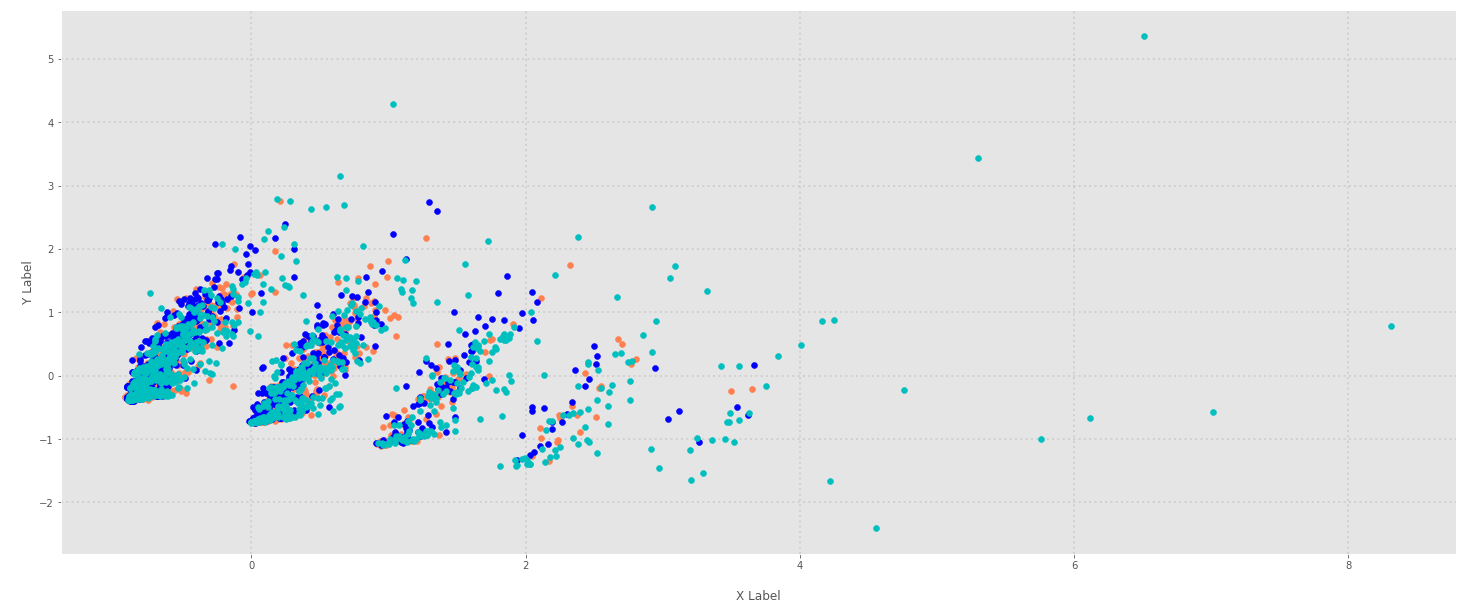

In [32]:
col = ['coral', 'blue', 'c']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [33]:
print(pca_f.explained_variance_ratio_)
print(sum(pca_f.explained_variance_ratio_))
# pca_f.explained_variance_ratio_

[0.08033016 0.03385429]
0.11418444853077084


In [36]:
pca_f1000 = PCA(n_components = 1000)
pca_f1000.fit(X_counts.toarray())
X_reduced = pca_f1000.fit_transform(X_counts.toarray())

print(pca_f1000.explained_variance_ratio_[0:10])
print(sum(pca_f1000.explained_variance_ratio_))

[0.08033016 0.03385429 0.026165   0.02547382 0.02061441 0.01903982
 0.01672877 0.01387246 0.01158402 0.01091184]
0.9258867373416915
